<a href="https://colab.research.google.com/github/mscampb4-ncsu/Homework5/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5
Author: Max Campbell

## Part I - Concepts

### Question 1 - The Five V's

The "Five V's of Big Data" are listed as: volume, variety, velocity, veracity (or variability), and value. A good example of how these concepts are realized in practice takes place at my current job. I am an anti-money laundering (AML) analyst, and it follows that I end up working with financial data in my day-to-day work. Specifically:

  * Volume - a large bank can have millions of customers, all conducting transactions on a daily basis.
  * Variety - regulatory requirements necessitate that the bank needs to have records on every customer, the transactions that take place in their accounts, as well as various other datasets that are maintained for different fields of work within the bank.
  * Velocity - a bank needs to be able to process records quickly and securely in order to meet regulatory standards on the safety of their transactions as well as mechanisms such as preventing financial crimes from occurring within their accounts.
  * Veracity - specific to AML, constant work is needed to maintain the accuracy of databases at the highest reasonable levels, especially as records can become inaccurate with user input which can lead to serious concerns about various financial crimes being overlooked in worst case scenarios.
  * Value - numerous insights can be generated from the data generated by a bank. To name a few, a bank may consider attempting to understand the geographic areas that it has the largest concentration of customers holding accounts to understand where it has an established foothold or identify opportunities to open more branches. Specific to AML, a bank may use transactional data to flag bank accounts for common indicators of financial crime, allowing for more efficient methods of detecting such crimes.

### Question 2 - CRUD

In the context of the baseball archive dataset, a Create, Read, Update, Delete (CRUD) process could apply as follows:

  * **C**reate - when the database was first created, the individual tables needed to be created. For example, a table was likely created in order to store the box scores of each game.
  * **R**ead - this occurs when the user selects the data that they wish to view. For example, a user can select all of the games that occurred in the 2015 MLB season.
  * **U**pdate - this occurs if the records being viewed are modified. For example, the user may have (hypothetically) spotted entries where the team's name was missing. The user could then set the missing team name to the correct string.
  * **D**elete - this occurs when records or tables are being removed from the database. For example, the user may choose to delete records from the table where the box scores were missing due to the game getting postponed.

### Question 3 - The HAVING Clause

When using the SELECT statement to view, update, or delete data, the HAVING clause defines a condition that must be met for a given group of data for the SELECT statement to return the entry. This is preceded by the GROUP BY statement as the information provided by grouping the data is what is tested by the condition. Using the baseball archive as a dataset, one may want to gather data that is specific to a given team, so they would GROUP BY the team variable and then specify the team's name or id under the HAVING clause.

## Part II - Simulation of a Sampling Distribution


Assuming a simple linear regression, we can "bootstrap" a sampling distribution by generating a large sample of estimates for the parameters of interest and analyzing the properties of those estimates. To start, we randomly generate some data to create a dataset and fit it to a basic SLR using some assumed values for the beta parameters and the sample size:

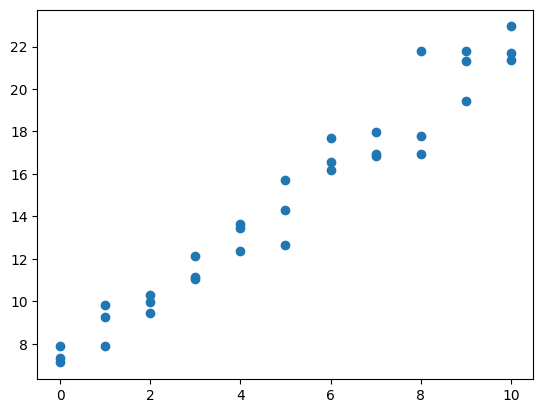

In [1]:
#Copy in code from HW5 assignment
#import some modules needed
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
rng = default_rng(32)
beta_0 = 7
beta_1 = 1.5
# get three 'values' of x at each integer from 0 to 10.
x = np.array(list(np.linspace(start = 0, stop = 10, num = 11))*3)
n = 33
#create the 'responses' modeled from the line plus a random deviation
y = beta_0 + beta_1*x + rng.standard_normal(n)
#visualize the data
plt.scatter(x = x, y = y)
plt.show()

Next, we can use the `sklearn` module to estimate a SLR and save whichever estimates we find interesting. In this case, we will be saving the slope estimate.

In [14]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x.reshape(-1, 1), y)
reg.coef_[0] #Outputs the slope

np.float64(1.4745056382493755)

Now that we've seen how the basic process works, we do this many times:

In [15]:
# Repeat the above process 5000 times
estimates = []
for i in range(5000):
  y = beta_0 + beta_1*x + rng.standard_normal(n)
  reg.fit(x.reshape(-1, 1), y)
  estimates.append(reg.coef_[0])

Let's see how the estimates are distributed:

(array([  1.,   1.,   0.,   2.,   5.,   9.,   8.,  34.,  34.,  48.,  89.,
        113., 165., 189., 237., 320., 333., 413., 393., 407., 420., 345.,
        316., 284., 231., 181., 143., 106.,  74.,  43.,  19.,  14.,   9.,
          7.,   1.,   2.,   2.,   0.,   1.,   1.]),
 array([1.28150891, 1.29286042, 1.30421192, 1.31556343, 1.32691494,
        1.33826644, 1.34961795, 1.36096945, 1.37232096, 1.38367247,
        1.39502397, 1.40637548, 1.41772699, 1.42907849, 1.44043   ,
        1.4517815 , 1.46313301, 1.47448452, 1.48583602, 1.49718753,
        1.50853903, 1.51989054, 1.53124205, 1.54259355, 1.55394506,
        1.56529656, 1.57664807, 1.58799958, 1.59935108, 1.61070259,
        1.6220541 , 1.6334056 , 1.64475711, 1.65610861, 1.66746012,
        1.67881163, 1.69016313, 1.70151464, 1.71286614, 1.72421765,
        1.73556916]),
 <BarContainer object of 40 artists>)

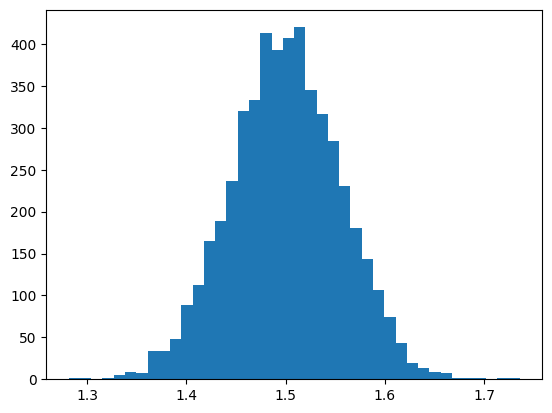

In [18]:
#Create a histogram of the slope estimator
plt.hist(estimates, bins = 40)

Seems that the estimates roughly centered around the 1.5 mark, which is to be expected as that is the value we assumed for `beta_1`. The applications of this method are very useful. For example, we can derive a 'p-value' by looking at how often our simulation estimated the slope to be above 1.65.

In [20]:
#Derive proportion of estimators that were above 1.65
prob = sum(1 for i in estimates if i >= 1.65) / 5000
print(prob)

0.0038


We see above that from our sample, there is a 0.38% chance that a given value from the sample was greater than or equal to 1.65. In hypothesis testing, this can be beneficial as deriving this probability can tell us how likely it is that we are operating under the null distribution or if we need to reject it in favor of an alternative hypothesis. In this case, the odds are pretty low that the true slope is greater than or equal to 1.65, so we would likely fail to reject the null hypothesis.

## Part III - Big Data Examples & Rare Events